# README
## Input
1. path to a3m data
    1. a3m file can be generated from https://toolkit.tuebingen.mpg.de/tools/hhblits
2. seq name
3. optional config

In [1]:
data_path = "/predictor/data"

prospr_path = "/prospr"

dbug = True

## Seq Name
Seq name should be the same as A3M file name

In [6]:
seq_name = 'T0955-2T'

## Prediction

In [7]:
input_a3m_file = data_path + '/' + seq_name + '/' + seq_name + '.a3m'
output_pkl_file = data_path + '/' + seq_name + '/'+seq_name + '_prediction.pkl'
if dbug == True:
    print(input_a3m_file)
    print(output_pkl_file)

/predictor/data/T0955-2T/T0955-2T.a3m
/predictor/data/T0955-2T/T0955-2T_prediction.pkl


In [8]:
%%bash -s "$seq_name" "$data_path" "$prospr_path"
export PATH="/hh-suite/build/bin:/hh-suite/build/scripts:$PATH"
cd $3
python prospr.py ..$2/$1/$1.a3m

Buildling input vector...
Loading ProSPr model(s)...
Model location: cuda:0
Making predictions...
Model location: cuda:0
Making predictions...
Model location: cuda:0
Making predictions...
Saving results...
Done! Successfully saved at  ./../predictor/data/T0955-2T/T0955-2T_prediction.pkl


2021-04-18 17:26:24.216547: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-04-18 17:26:24.216563: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
- 17:26:25.438 INFO: ../predictor/data/T0955-2T/T0955-2T.a3m is in A2M, A3M or FASTA format

2021-04-18 17:26:25.447724: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-18 17:26:25.447816: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-18 17:26:25.447955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least o

## Visualization

Text(0, 0.5, 'Residue j')

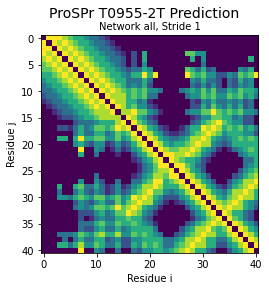

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd

def load(fileName):
    fileObject2 = open(fileName, 'rb')
    modelInput = pkl.load(fileObject2)
    fileObject2.close()
    return modelInput

prediction = load(output_pkl_file)

plt.imshow(-np.argmax(prediction['dist'][1:,:,:],axis=0))
plt.suptitle('ProSPr '+seq_name+' Prediction', fontsize=14)
plt.title('Network all, Stride 1', fontsize=10)
plt.xlabel('Residue i')
plt.ylabel('Residue j')

Text(0, 0.5, 'Residue j')

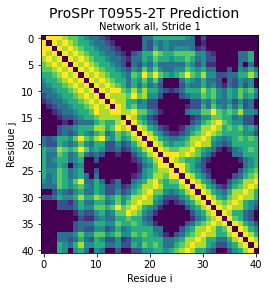

In [10]:
prediction = load('/predictor/data/T0955/T0955_prediction.pkl')

plt.imshow(-np.argmax(prediction['dist'][1:,:,:],axis=0))
plt.suptitle('ProSPr '+seq_name+' Prediction', fontsize=14)
plt.title('Network all, Stride 1', fontsize=10)
plt.xlabel('Residue i')
plt.ylabel('Residue j')